# Projeto Final de Ciencia dos Dados

Grupo: André Matarazzo e Gustavo Pierre

Dataset: Fifa18 / link: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset

In [228]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [204]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing


# Objetivo

O objetivo do nosso projeto é analisar o dataset do fifa18 com todos jogadores e seus atributos, e assim, determinar, pelos atributos, qual a posição que um jogador joga.

In [205]:
fifa18 = pd.read_excel('FIFA.xlsx')
fifa18_2 = fifa18

In [206]:
fifa18.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,â‚¬95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,â‚¬105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,â‚¬123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,â‚¬97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,â‚¬61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
del fifa18['Photo']
del fifa18['Flag']
del fifa18['Club Logo']
del fifa18['Special']

In [208]:
fifa18.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,â‚¬95.5M,â‚¬565K,89,63,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,â‚¬105M,â‚¬565K,92,48,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,â‚¬123M,â‚¬280K,94,56,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. SuÃ¡rez,30,Uruguay,92,92,FC Barcelona,â‚¬97M,â‚¬510K,88,78,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,â‚¬61M,â‚¬230K,58,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
fifa18.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [210]:
fifa18.describe()

,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.00000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,25.144541,66.247984,71.190813,64.600578,55.82298,63.342417,63.815528,58.111451,57.896057,49.781380,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,4.614272,6.987965,6.102199,14.907052,17.46764,14.791361,14.094377,16.796284,12.926942,18.459139,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,16.000000,46.000000,46.000000,11.000000,11.00000,14.000000,11.000000,8.000000,5.000000,5.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,21.000000,62.000000,67.000000,56.000000,43.00000,55.000000,56.000000,53.000000,51.000000,38.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,25.000000,66.000000,71.000000,67.000000,59.00000,65.000000,66.000000,63.000000,60.000000,54.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,28.000000,71.000000,75.000000,75.000000,69.00000,74.000000,74.000000,69.000000,67.000000,64.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,47.000000,94.000000,94.000000,96.000000,96.00000,96.000000,96.000000,95.000000,96.000000,91.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [211]:
fifa18.dtypes

Name                    object
Age                      int64
Nationality             object
Overall                  int64
Potential                int64
Club                    object
Value                   object
Wage                    object
Acceleration             int64
Aggression               int64
Agility                  int64
Balance                  int64
Ball control             int64
Composure                int64
Crossing                 int64
Curve                    int64
Dribbling                int64
Finishing                int64
Free kick accuracy       int64
GK diving                int64
GK handling              int64
GK kicking               int64
GK positioning           int64
GK reflexes              int64
Heading accuracy         int64
Interceptions            int64
Jumping                  int64
Long passing             int64
Long shots               int64
Marking                  int64
                        ...   
Vision                   int64
Volleys 

In [212]:
def troca_obj_float (coluna):
    fifa18[coluna] = fifa18[coluna].astype('float64')

In [213]:
from pandas import DataFrame

fifa18 = DataFrame(fifa18, columns=['Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB','ST','LW'])

for e in fifa18:
    coluna=troca_obj_float(e)
    
    

In [214]:
fifa18.dtypes

Acceleration          float64
Aggression            float64
Agility               float64
Balance               float64
Ball control          float64
Composure             float64
Crossing              float64
Curve                 float64
Dribbling             float64
Finishing             float64
Free kick accuracy    float64
GK diving             float64
GK handling           float64
GK kicking            float64
GK positioning        float64
GK reflexes           float64
Heading accuracy      float64
Interceptions         float64
Jumping               float64
Long passing          float64
Long shots            float64
Marking               float64
Penalties             float64
Positioning           float64
Reactions             float64
Short passing         float64
Shot power            float64
Sliding tackle        float64
Sprint speed          float64
Stamina               float64
                       ...   
Strength              float64
Vision                float64
Volleys   

# Posições

Hoje em dia a formação mais comum no futebol é a 4-3-3. Nela, contamos com um goleiro, dois zagueiros, 2 laterais(direito e esquerdo), três meio-campos e três atacantes(um central e dois abertos).

In [215]:
fifa18_analiseCB=fifa18[['CB','Aggression','Interceptions','Marking','Sliding tackle','Standing tackle']]
fifa18_analiseCB.corr()

,CB,Aggression,Interceptions,Marking,Sliding tackle,Standing tackle
CB,1.000000,0.748338,0.941310,0.941224,0.929456,0.949818
Aggression,0.748338,1.000000,0.742923,0.715728,0.709387,0.732740
Interceptions,0.941310,0.742923,1.000000,0.927608,0.920212,0.934737
Marking,0.941224,0.715728,0.927608,1.000000,0.960985,0.961113
Sliding tackle,0.929456,0.709387,0.920212,0.960985,1.000000,0.972506
Standing tackle,0.949818,0.732740,0.934737,0.961113,0.972506,1.000000


In [216]:
fifa18_analiseCAM=fifa18[['CAM','Ball control','Crossing','Curve','Dribbling','Finishing','Free kick accuracy','Long shots','Positioning','Short passing','Shot power','Vision','Volleys']]
fifa18_analiseCAM.corr()

,CAM,Ball control,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,Long shots,Positioning,Short passing,Shot power,Vision,Volleys
CAM,1.000000,0.921189,0.732099,0.796107,0.908719,0.772853,0.702388,0.831632,0.852649,0.802186,0.722553,0.886315,0.756350
Ball control,0.921189,1.000000,0.839828,0.832500,0.932673,0.784916,0.764511,0.833555,0.861126,0.905699,0.828611,0.722073,0.793091
Crossing,0.732099,0.839828,1.000000,0.831294,0.852868,0.649904,0.763378,0.741006,0.778074,0.810831,0.705209,0.684227,0.688208
Curve,0.796107,0.832500,0.831294,1.000000,0.841638,0.754035,0.857848,0.832432,0.808384,0.778628,0.785330,0.743942,0.800728
Dribbling,0.908719,0.932673,0.852868,0.841638,1.000000,0.821036,0.754090,0.838454,0.893558,0.836688,0.797107,0.729578,0.809249
Finishing,0.772853,0.784916,0.649904,0.754035,0.821036,1.000000,0.693358,0.866884,0.882701,0.658974,0.799672,0.689485,0.879710
Free kick accuracy,0.702388,0.764511,0.763378,0.857848,0.754090,0.693358,1.000000,0.802702,0.732860,0.741505,0.749772,0.714327,0.745434
Long shots,0.831632,0.833555,0.741006,0.832432,0.838454,0.866884,0.802702,1.000000,0.854386,0.762817,0.880129,0.747013,0.860105
Positioning,0.852649,0.861126,0.778074,0.808384,0.893558,0.882701,0.732860,0.854386,1.000000,0.758446,0.801224,0.734313,0.847061
Short passing,0.802186,0.905699,0.810831,0.778628,0.836688,0.658974,0.741505,0.762817,0.758446,1.000000,0.769784,0.719489,0.696114


In [217]:
fifa18_analiseCDM=fifa18[['CDM','Aggression','Interceptions','Marking','Sliding tackle','Standing tackle']]
fifa18_analiseCDM.corr()

,CDM,Aggression,Interceptions,Marking,Sliding tackle,Standing tackle
CDM,1.000000,0.711130,0.893164,0.844273,0.838502,0.866010
Aggression,0.711130,1.000000,0.742923,0.715728,0.709387,0.732740
Interceptions,0.893164,0.742923,1.000000,0.927608,0.920212,0.934737
Marking,0.844273,0.715728,0.927608,1.000000,0.960985,0.961113
Sliding tackle,0.838502,0.709387,0.920212,0.960985,1.000000,0.972506
Standing tackle,0.866010,0.732740,0.934737,0.961113,0.972506,1.000000


In [218]:
fifa18_analiseCM=fifa18[['CM','Ball control','Composure','Crossing','Curve','Dribbling','Long passing','Long shots','Reactions','Short passing','Vision']]
fifa18_analiseCM.corr()

,CM,Ball control,Composure,Crossing,Curve,Dribbling,Long passing,Long shots,Reactions,Short passing,Vision
CM,1.000000,0.873643,0.713268,0.733084,0.724634,0.751104,0.848347,0.709441,0.732892,0.916952,0.841507
Ball control,0.873643,1.000000,0.763789,0.839828,0.832500,0.932673,0.784481,0.833555,0.429334,0.905699,0.722073
Composure,0.713268,0.763789,1.000000,0.647727,0.668908,0.680401,0.694752,0.667611,0.594202,0.757845,0.635486
Crossing,0.733084,0.839828,0.647727,1.000000,0.831294,0.852868,0.757269,0.741006,0.381927,0.810831,0.684227
Curve,0.724634,0.832500,0.668908,0.831294,1.000000,0.841638,0.710366,0.832432,0.408189,0.778628,0.743942
Dribbling,0.751104,0.932673,0.680401,0.852868,0.841638,1.000000,0.712169,0.838454,0.351607,0.836688,0.729578
Long passing,0.848347,0.784481,0.694752,0.757269,0.710366,0.712169,1.000000,0.667223,0.448989,0.895731,0.691640
Long shots,0.709441,0.833555,0.667611,0.741006,0.832432,0.838454,0.667223,1.000000,0.412355,0.762817,0.747013
Reactions,0.732892,0.429334,0.594202,0.381927,0.408189,0.351607,0.448989,0.412355,1.000000,0.464096,0.483466
Short passing,0.916952,0.905699,0.757845,0.810831,0.778628,0.836688,0.895731,0.762817,0.464096,1.000000,0.719489


In [219]:
fifa18_analiseLB=fifa18[['LB','Interceptions','Marking','Sliding tackle','Standing tackle']]
fifa18_analiseLB.corr()

,LB,Interceptions,Marking,Sliding tackle,Standing tackle
LB,1.000000,0.895004,0.866949,0.877306,0.885623
Interceptions,0.895004,1.000000,0.927608,0.920212,0.934737
Marking,0.866949,0.927608,1.000000,0.960985,0.961113
Sliding tackle,0.877306,0.920212,0.960985,1.000000,0.972506
Standing tackle,0.885623,0.934737,0.961113,0.972506,1.000000


In [220]:
fifa18_analiseLW =fifa18[['LW','Agility','Ball control','Crossing','Curve','Dribbling','Finishing','Long shots','Positioning','Short passing','Shot power','Vision','Volleys']]
fifa18_analiseLW.corr()

,LW,Agility,Ball control,Crossing,Curve,Dribbling,Finishing,Long shots,Positioning,Short passing,Shot power,Vision,Volleys
LW,1.000000,0.697810,0.899655,0.771786,0.795868,0.933991,0.793891,0.816996,0.871166,0.725103,0.700408,0.830745,0.761340
Agility,0.697810,1.000000,0.700943,0.689988,0.674898,0.759195,0.634081,0.637642,0.698466,0.610704,0.565988,0.591396,0.622264
Ball control,0.899655,0.700943,1.000000,0.839828,0.832500,0.932673,0.784916,0.833555,0.861126,0.905699,0.828611,0.722073,0.793091
Crossing,0.771786,0.689988,0.839828,1.000000,0.831294,0.852868,0.649904,0.741006,0.778074,0.810831,0.705209,0.684227,0.688208
Curve,0.795868,0.674898,0.832500,0.831294,1.000000,0.841638,0.754035,0.832432,0.808384,0.778628,0.785330,0.743942,0.800728
Dribbling,0.933991,0.759195,0.932673,0.852868,0.841638,1.000000,0.821036,0.838454,0.893558,0.836688,0.797107,0.729578,0.809249
Finishing,0.793891,0.634081,0.784916,0.649904,0.754035,0.821036,1.000000,0.866884,0.882701,0.658974,0.799672,0.689485,0.879710
Long shots,0.816996,0.637642,0.833555,0.741006,0.832432,0.838454,0.866884,1.000000,0.854386,0.762817,0.880129,0.747013,0.860105
Positioning,0.871166,0.698466,0.861126,0.778074,0.808384,0.893558,0.882701,0.854386,1.000000,0.758446,0.801224,0.734313,0.847061
Short passing,0.725103,0.610704,0.905699,0.810831,0.778628,0.836688,0.658974,0.762817,0.758446,1.000000,0.769784,0.719489,0.696114


In [221]:
fifa18_analiseRB =fifa18[['RB','Interceptions','Marking','Sliding tackle','Standing tackle']]
fifa18_analiseRB.corr()

,RB,Interceptions,Marking,Sliding tackle,Standing tackle
RB,1.000000,0.895004,0.866949,0.877306,0.885623
Interceptions,0.895004,1.000000,0.927608,0.920212,0.934737
Marking,0.866949,0.927608,1.000000,0.960985,0.961113
Sliding tackle,0.877306,0.920212,0.960985,1.000000,0.972506
Standing tackle,0.885623,0.934737,0.961113,0.972506,1.000000


In [222]:
fifa18_analiseRW =fifa18[['RW','Agility','Ball control','Crossing','Curve','Dribbling','Finishing','Long shots','Positioning','Short passing','Shot power','Vision','Volleys']]
fifa18_analiseRW.corr()

,RW,Agility,Ball control,Crossing,Curve,Dribbling,Finishing,Long shots,Positioning,Short passing,Shot power,Vision,Volleys
RW,1.000000,0.697810,0.899655,0.771786,0.795868,0.933991,0.793891,0.816996,0.871166,0.725103,0.700408,0.830745,0.761340
Agility,0.697810,1.000000,0.700943,0.689988,0.674898,0.759195,0.634081,0.637642,0.698466,0.610704,0.565988,0.591396,0.622264
Ball control,0.899655,0.700943,1.000000,0.839828,0.832500,0.932673,0.784916,0.833555,0.861126,0.905699,0.828611,0.722073,0.793091
Crossing,0.771786,0.689988,0.839828,1.000000,0.831294,0.852868,0.649904,0.741006,0.778074,0.810831,0.705209,0.684227,0.688208
Curve,0.795868,0.674898,0.832500,0.831294,1.000000,0.841638,0.754035,0.832432,0.808384,0.778628,0.785330,0.743942,0.800728
Dribbling,0.933991,0.759195,0.932673,0.852868,0.841638,1.000000,0.821036,0.838454,0.893558,0.836688,0.797107,0.729578,0.809249
Finishing,0.793891,0.634081,0.784916,0.649904,0.754035,0.821036,1.000000,0.866884,0.882701,0.658974,0.799672,0.689485,0.879710
Long shots,0.816996,0.637642,0.833555,0.741006,0.832432,0.838454,0.866884,1.000000,0.854386,0.762817,0.880129,0.747013,0.860105
Positioning,0.871166,0.698466,0.861126,0.778074,0.808384,0.893558,0.882701,0.854386,1.000000,0.758446,0.801224,0.734313,0.847061
Short passing,0.725103,0.610704,0.905699,0.810831,0.778628,0.836688,0.658974,0.762817,0.758446,1.000000,0.769784,0.719489,0.696114


In [223]:
fifa18_analiseST =fifa18[['ST','Ball control','Curve','Dribbling','Finishing','Long shots','Penalties','Positioning','Shot power','Vision','Volleys']]
fifa18_analiseST.corr()

,ST,Ball control,Curve,Dribbling,Finishing,Long shots,Penalties,Positioning,Shot power,Vision,Volleys
ST,1.000000,0.846925,0.729286,0.825582,0.881245,0.860435,0.729116,0.883531,0.822876,0.755299,0.830853
Ball control,0.846925,1.000000,0.832500,0.932673,0.784916,0.833555,0.770217,0.861126,0.828611,0.722073,0.793091
Curve,0.729286,0.832500,1.000000,0.841638,0.754035,0.832432,0.751569,0.808384,0.785330,0.743942,0.800728
Dribbling,0.825582,0.932673,0.841638,1.000000,0.821036,0.838454,0.768940,0.893558,0.797107,0.729578,0.809249
Finishing,0.881245,0.784916,0.754035,0.821036,1.000000,0.866884,0.833785,0.882701,0.799672,0.689485,0.879710
Long shots,0.860435,0.833555,0.832432,0.838454,0.866884,1.000000,0.805521,0.854386,0.880129,0.747013,0.860105
Penalties,0.729116,0.770217,0.751569,0.768940,0.833785,0.805521,1.000000,0.800405,0.787331,0.636776,0.823297
Positioning,0.883531,0.861126,0.808384,0.893558,0.882701,0.854386,0.800405,1.000000,0.801224,0.734313,0.847061
Shot power,0.822876,0.828611,0.785330,0.797107,0.799672,0.880129,0.787331,0.801224,1.000000,0.667207,0.821644
Vision,0.755299,0.722073,0.743942,0.729578,0.689485,0.747013,0.636776,0.734313,0.667207,1.000000,0.694511


In [224]:
fifa18_analiseGK = fifa18[['GK diving','GK handling','GK kicking','GK positioning','GK reflexes']]
fifa18_analiseGK.corr()

,GK diving,GK handling,GK kicking,GK positioning,GK reflexes
GK diving,1.000000,0.969429,0.964298,0.968807,0.972755
GK handling,0.969429,1.000000,0.963979,0.968603,0.969274
GK kicking,0.964298,0.963979,1.000000,0.962916,0.965235
GK positioning,0.968807,0.968603,0.962916,1.000000,0.969159
GK reflexes,0.972755,0.969274,0.965235,0.969159,1.000000


In [225]:
fifa18_2.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [226]:
fifa18_analiseGeral = fifa18_2[['Name','Overall','Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys','CB','LB','RB','CM','CDM','CAM','RW','LW','ST','Preferred Positions']]
fifa18_analiseGeral.head()

,Name,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,CB,LB,RB,CM,CDM,CAM,RW,LW,ST,Preferred Positions
0,Cristiano Ronaldo,94,89,63,89,63,93,95,85,81,...,53.0,61.0,61.0,82.0,62.0,89.0,91.0,91.0,92.0,ST LW
1,L. Messi,93,92,48,90,95,95,96,77,89,...,45.0,57.0,57.0,84.0,59.0,92.0,91.0,91.0,88.0,RW
2,Neymar,92,94,56,96,82,95,92,75,81,...,46.0,59.0,59.0,79.0,59.0,88.0,89.0,89.0,84.0,LW
3,L. SuÃ¡rez,92,88,78,86,60,91,83,77,86,...,58.0,64.0,64.0,80.0,65.0,87.0,87.0,87.0,88.0,ST
4,M. Neuer,92,58,29,52,35,48,70,15,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK


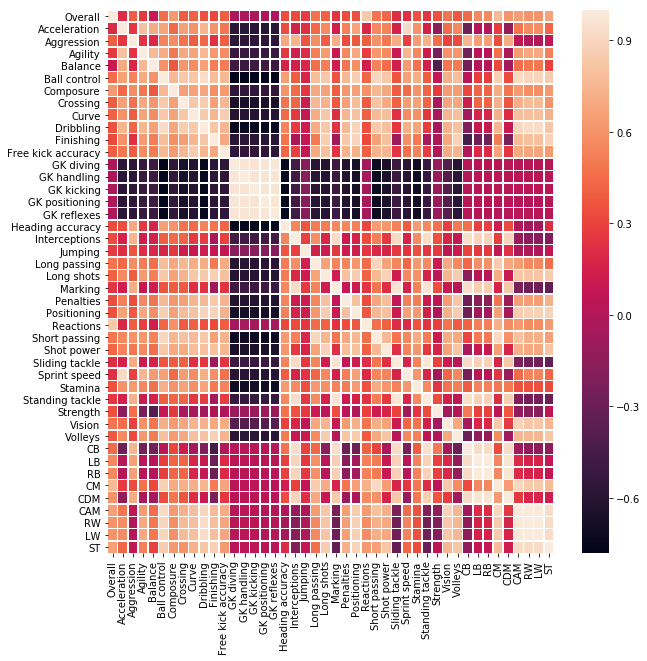

In [229]:
plt.figure(figsize = (10, 10))
sns.heatmap(fifa18_analiseGeral.corr(), linewidth=0.5)
plt.show()

In [230]:
principal = []
for e in fifa18_2["Preferred Positions"]:
    posição_principal = e.split(" ")
    principal.append(posição_principal[0])


Melhorposição = pd.Series(principal)

In [231]:
fifa18_analiseGeral['Posição'] = Melhorposição
fifa18_analiseGeral.head()
fifa18_analiseGeral.columns

C:\Users\gppie\OneDrive\Documentos\INSPER\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Index(['Name', 'Overall', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CB', 'LB', 'RB', 'CM', 'CDM', 'CAM',
       'RW', 'LW', 'ST', 'Preferred Positions', 'Posição'],
      dtype='object')

In [232]:
fifa18_analiseGeral['Posição'] = fifa18_analiseGeral['Posição'].str.strip()
fifa18_analiseGeral = fifa18_analiseGeral[fifa18_analiseGeral['Posição'] != 'GK']
fifa18_analiseGeral.head()

C:\Users\gppie\OneDrive\Documentos\INSPER\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,LB,RB,CM,CDM,CAM,RW,LW,ST,Preferred Positions,Posição
0,Cristiano Ronaldo,94,89,63,89,63,93,95,85,81,...,61.0,61.0,82.0,62.0,89.0,91.0,91.0,92.0,ST LW,ST
1,L. Messi,93,92,48,90,95,95,96,77,89,...,57.0,57.0,84.0,59.0,92.0,91.0,91.0,88.0,RW,RW
2,Neymar,92,94,56,96,82,95,92,75,81,...,59.0,59.0,79.0,59.0,88.0,89.0,89.0,84.0,LW,LW
3,L. SuÃ¡rez,92,88,78,86,60,91,83,77,86,...,64.0,64.0,80.0,65.0,87.0,87.0,87.0,88.0,ST,ST
5,R. Lewandowski,91,79,80,78,80,89,87,62,77,...,58.0,58.0,78.0,62.0,84.0,84.0,84.0,88.0,ST,ST


In [233]:
del fifa18_analiseGeral['Preferred Positions']
del fifa18_analiseGeral['GK diving']
del fifa18_analiseGeral['GK handling']
del fifa18_analiseGeral['GK kicking']
del fifa18_analiseGeral['GK positioning']
del fifa18_analiseGeral['GK reflexes']

In [234]:
del fifa18_analiseGeral['Name']
del fifa18_analiseGeral['Overall']

In [235]:
lista_posições = []
#for e in fifa18_analiseGeral["Posição"]:
#    if e == "RM":
#        lista_posições.append("RW")
#    elif e == "LM":
#        fifa18_analiseGeral["Posição"] = "LW"

In [236]:
fifa18_analiseGeral.columns

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'CB', 'LB', 'RB', 'CM', 'CDM', 'CAM', 'RW', 'LW', 'ST',
       'Posição'],
      dtype='object')

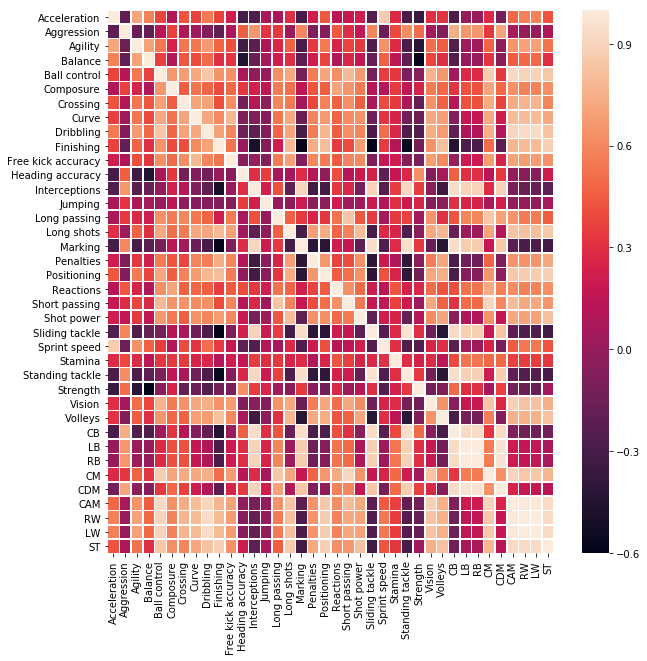

In [237]:
plt.figure(figsize = (10, 10))
sns.heatmap(fifa18_analiseGeral.corr(), linewidth=0.5)
plt.show()

In [238]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["CB", "LB", "RB", "CDM","CM","CAM","LW","LM","RM","ST","RW"])
LabelEncoder()
list(le.classes_)
["CB", "LB", "RB", "CDM","CM","CAM","LW","LM","RM","ST","RW"]
le.transform(["CB", "LB", "RB", "CDM","CM","CAM","LW","LM","RM","ST","RW"]) 

array([ 1,  4,  7,  2,  3,  0,  6,  5,  8, 10,  9], dtype=int64)

# Regressão Logistica

In [239]:
Y = fifa18_analiseGeral["Posição"]
X = fifa18_analiseGeral
del X["Posição"]

In [240]:
RANDOM_SEED = 5

np.random.seed(RANDOM_SEED)


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=RANDOM_SEED)

In [241]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((10687, 38), (10687,), (5265, 38), (5265,))

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(Y_test, Y_pred)))

C:\Users\gppie\OneDrive\Documentos\INSPER\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gppie\OneDrive\Documentos\INSPER\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Acurácia: 0.47939221272554605


# Conversão Catégorica

In [243]:
fifa18_analiseGeral['Posição'] = Melhorposição
fifa18_analiseGeral.head()
fifa18_analiseGeral.columns

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Interceptions', 'Jumping',
       'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
       'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision',
       'Volleys', 'CB', 'LB', 'RB', 'CM', 'CDM', 'CAM', 'RW', 'LW', 'ST',
       'Posição'],
      dtype='object')

In [251]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    # Nota: se você for um econometrista, pode se interessar por usar a opção dropFirst = True na get_dummies
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [252]:
res = dummify(fifa18_analiseGeral, "Posição")

# RandomForest

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print('Acurácia: {}'.format(accuracy_score(Y_test, Y_pred)))

C:\Users\gppie\OneDrive\Documentos\INSPER\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Acurácia: 0.45242165242165244


In [258]:
ct = pd.crosstab(Y_test, Y_pred)
ct

col_0,CAM,CB,CDM,CF,CM,LB,LM,LW,RB,RM,RW,RWB,ST
Posição,,,,,,,,,,,,,
CAM,101,1,36,4,87,3,56,7,1,46,2,0,49
CB,2,766,43,0,23,46,2,0,32,0,0,0,0
CDM,28,68,156,0,153,19,7,1,13,3,0,1,1
CF,8,0,1,6,6,0,8,1,0,8,0,0,23
CM,67,51,146,1,300,16,18,2,10,19,0,0,5
LB,2,81,19,0,21,177,9,0,99,7,0,0,0
LM,62,2,25,6,53,36,92,5,17,58,10,0,65
LW,23,0,6,4,13,2,23,9,0,23,11,0,37
LWB,0,3,2,0,4,15,3,0,7,2,0,0,0
